In [1]:
pip install PyCurve==0.0.6

  Attempting uninstall: PyCurve
    Found existing installation: PyCurve 0.0.5
    Uninstalling PyCurve-0.0.5:
      Successfully uninstalled PyCurve-0.0.5
You should consider upgrading via the '/usr/local/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


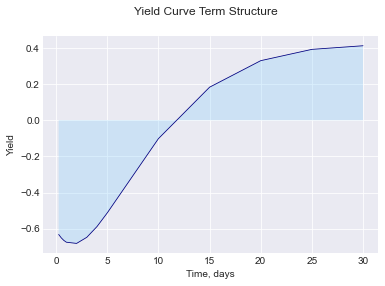

[-0.63171  -0.650322 -0.664493 -0.674608 -0.681294 -0.647593 -0.587828
 -0.51251  -0.101804  0.182851  0.32962   0.392117  0.412151]
[ 0.25  0.5   0.75  1.    2.    3.    4.    5.   10.   15.   20.   25.
 30.  ]


In [2]:
import numpy as np
from PyCurve.curve import Curve
time = np.array([0.25, 0.5, 0.75, 1., 2., 
        3., 4., 5., 10., 15., 
        20.,25.,30.])
rate = np.array([-0.63171, -0.650322, -0.664493, -0.674608, -0.681294,
        -0.647593, -0.587828, -0.51251, -0.101804,  0.182851,
        0.32962,0.392117,  0.412151])
curve = Curve(time,rate)
curve.plot_curve()
print(curve.get_rate)
print(curve.get_time)

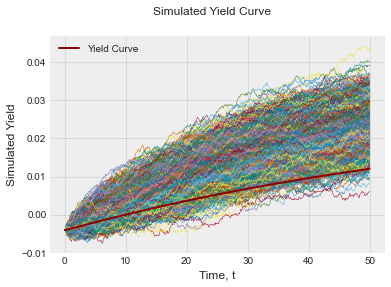

In [3]:
from PyCurve.vasicek import Vasicek
vasicek_model = Vasicek(0.02, 0.04, 0.001, -0.004, 50, 30 / 365)
simulation = vasicek_model.simulate_paths(2000) #Return a Simulation and then we can apply Simulation Methods
simulation.plot_yield_curve()

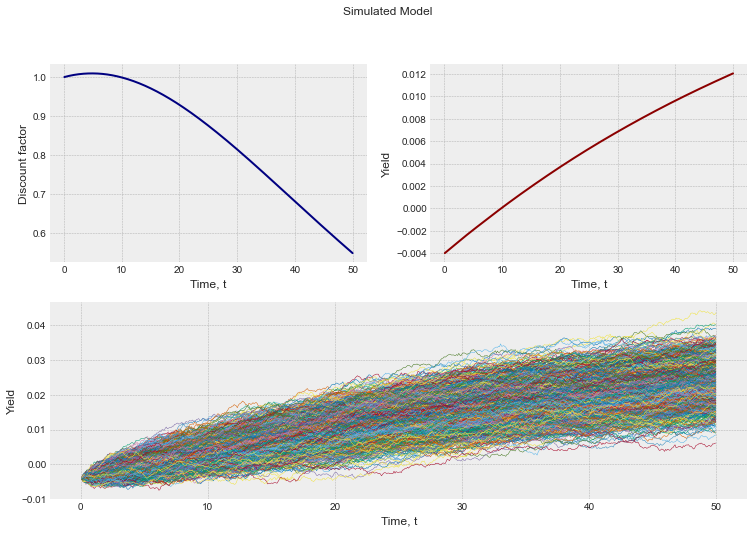

In [4]:
simulation.plot_model()

In [5]:
from PyCurve.linear import LinearCurve
linear_curve = LinearCurve(curve)
print("7.5-year rate : "+str(linear_curve.d_rate(7.5)))
print("7.5-year discount rate : "+str(linear_curve.df_t(7.5)))
print("Forward rate between 7.5 and 12.5 years : "+str(linear_curve.forward(7.5,12.5)))

7.5-year rate : -0.307157
7.5-year discount rate : 1.0233404498400862
Forward rate between 7.5 and 12.5 years : 0.5620442499999999


In [6]:
from PyCurve.cubic import CubicCurve
cubic_curve = CubicCurve(curve)
print("10-year rate : "+str(cubic_curve.d_rate(7.5)))
print("10-year discount rate : "+str(cubic_curve.df_t(7.5)))
print("Forward rate between 10 and 20 years : "+str(cubic_curve.forward(7.5,12.5)))

10-year rate : -0.3036366057950627
10-year discount rate : 1.0230694659050514
Forward rate between 10 and 20 years : 0.6078001168478189


In [7]:
from PyCurve.nelson_siegel import NelsonSiegel
ns = NelsonSiegel(0.3,0.4,12,1)
ns.calibrate(curve)

Nelson Siegel Model
beta0 = 0.751506062319988
beta1 = -1.3304971868997248
beta2 = -2.2203178895179176
tau = 2.5493056203052005
____________________________
Calibration Results
CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
Mean Squared Error 0.0042367306926415285
Number of Iterations 20
____________________________


      fun: 0.0042367306926415285
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.40077054e-06,  9.51322360e-07, -2.33927462e-07,  7.97278914e-07])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 105
      nit: 20
     njev: 21
   status: 0
  success: True
        x: array([ 0.75150606, -1.33049719, -2.22031789,  2.54930562])

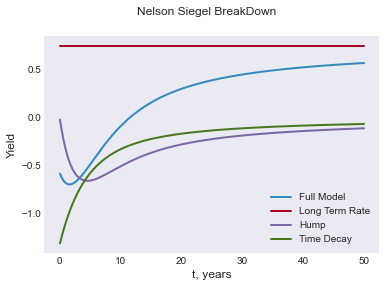

In [8]:
ns.plot_model()

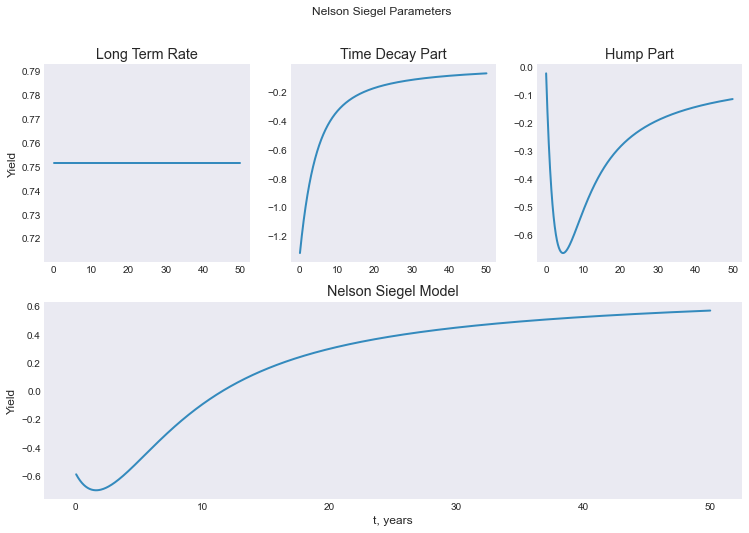

In [9]:
ns.plot_model_params()

In [10]:
from PyCurve.svensson_nelson_siegel import NelsonSiegelAugmented
nss = NelsonSiegelAugmented(0.3,0.4,12,12,1,1)
nss.calibrate(curve)

Augmented Nelson Siegel Model
beta0 = 0.7515069899513361
beta1 = -1.3304984652740972
beta2 = -1.3582175270153745
beta3 = -0.8621237370245594
tau = 2.5492666085730384
tau2 = 2.5493745447283485
____________________________
Calibration Results
CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
Mean Squared Error 0.004236730702075479
Number of Iterations 31
____________________________


      fun: 0.004236730702075479
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([-8.70041881e-06, -3.48375844e-06, -1.71824361e-06, -1.71911096e-06,
        1.00535900e-06,  3.23178986e-07])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 245
      nit: 31
     njev: 35
   status: 0
  success: True
        x: array([ 0.75150699, -1.33049847, -1.35821753, -0.86212374,  2.54926661,
        2.54937454])

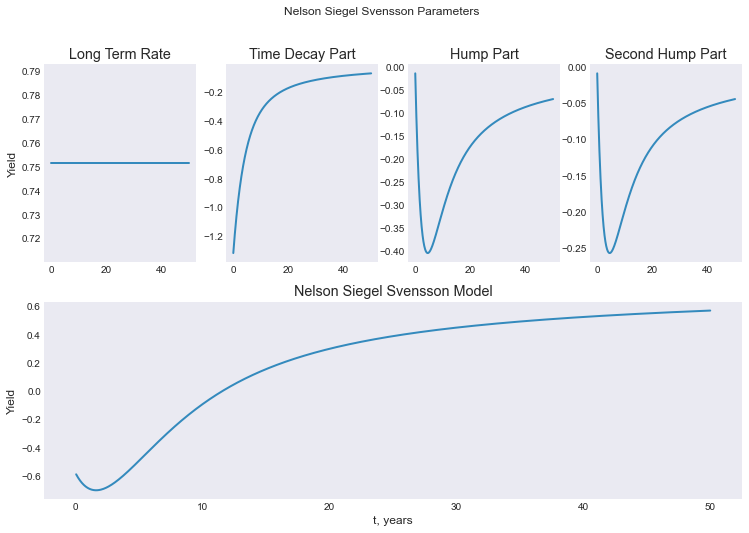

In [11]:
nss.plot_model_params()

In [12]:
from PyCurve.bjork_christensen import BjorkChristensen
bjc = BjorkChristensen(0.3,0.4,12,12,1)
bjc.calibrate(curve)

Bjork & Christensen Model
beta0 = 0.7241026361747042
beta1 = 1.2630412759302045
beta2 = -4.075775255903699
beta3 = -2.61578890758314
tau = 2.0454907238894267
____________________________
Calibration Results
CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
Mean Squared Error 0.002575936865445517
Number of Iterations 37
____________________________


      fun: 0.002575936865445517
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.34584183e-06,  7.22165387e-07, -9.63335320e-07,  1.34501786e-06,
        4.57750160e-07])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 252
      nit: 37
     njev: 42
   status: 0
  success: True
        x: array([ 0.72410264,  1.26304128, -4.07577526, -2.61578891,  2.04549072])

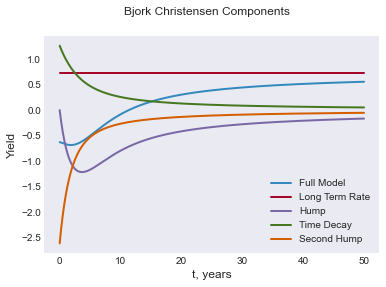

In [13]:
bjc.plot_model()

In [14]:
from PyCurve.bjork_christensen_augmented import BjorkChristensenAugmented
bjc_a = BjorkChristensenAugmented(0.3,0.4,12,12,12,1)
bjc_a.calibrate(curve)

Bjork & Christensen Augmented Model
beta0 = 1.5954945516202643
beta1 = -0.1362673420894012
beta2 = -1.921347491829477
beta3 = -3.100138400789165
beta4 = -0.2790540854856497
tau = 3.3831338085688625
____________________________
Calibration Results
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
Mean Squared Error 4.6222147406189135e-05
Number of Iterations 45
____________________________


      fun: 4.6222147406189135e-05
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.13922277e-05, -1.14224797e-04, -3.47444433e-05,  2.07803821e-05,
        7.91378953e-06,  6.50288949e-06])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 357
      nit: 45
     njev: 51
   status: 0
  success: True
        x: array([ 1.59549455, -0.13626734, -1.92134749, -3.1001384 , -0.27905409,
        3.38313381])

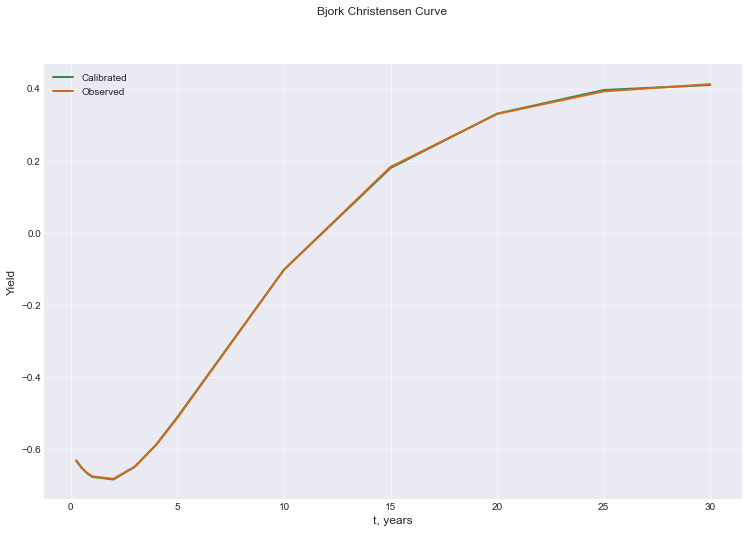

In [15]:
bjc_a.plot_calibrated(curve)

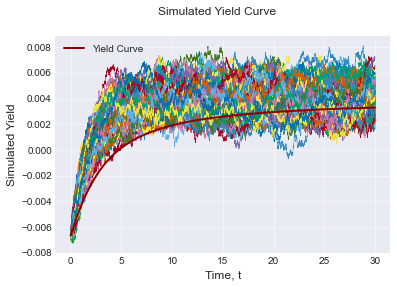

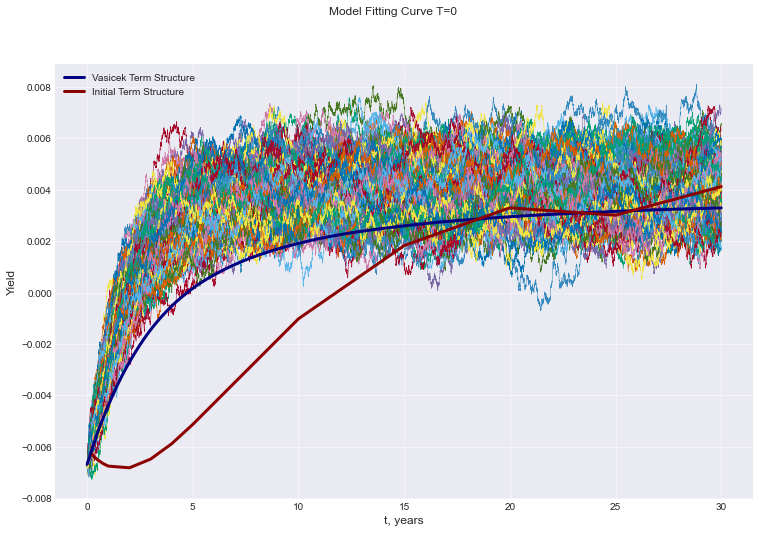

In [16]:
time = np.array([0.25, 0.5, 0.75, 1., 2.,
                 3., 4., 5., 10., 15.,
                 20., 25., 30.])
rate = np.array([-0.0063171, -0.00650322, -0.00664493, -0.00674608, -0.00681294,
                 -0.00647593, -0.00587828, -0.0051251, -0.00101804, 0.00182851,
                 0.0032962, 0.0030092117, 0.00412151])
curve = Curve(time,rate)
vasicek_model = Vasicek(0.5, 0.0040, 0.001, -0.0067, 30, 1 / 365)
simulation = vasicek_model.simulate_paths(200)
simulation.plot_yield_curve()
vasicek_model.plot_calibrated(simulation,curve)

Bjork & Christensen Augmented Model
beta0 = 0.0003242320890548229
beta1 = 0.00042283628067360974
beta2 = 0.014729859086888815
beta3 = -0.03083749691652102
beta4 = -0.020626731632810553
tau = 1.137911384276111
____________________________
Calibration Results
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
Mean Squared Error 3.084012924460394e-06
Number of Iterations 24
____________________________


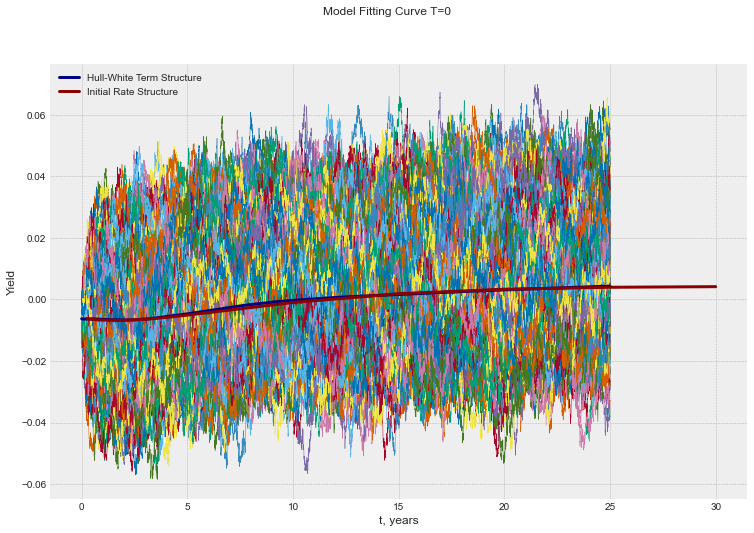

In [18]:
from PyCurve.bjork_christensen_augmented import BjorkChristensenAugmented
from PyCurve.hull_white import HullWhite
import numpy as np
from PyCurve.curve import Curve

time = np.array([0.25, 0.5, 0.75, 1., 2.,
                 3., 4., 5., 10., 15.,
                 20., 25., 30.])
rate = np.array([-0.0063171, -0.00650322, -0.00664493, -0.00674608, -0.00681294,
                 -0.00647593, -0.00587828, -0.0051251, -0.00101804, 0.00182851,
                 0.0032962, 0.00392117, 0.00412151])

curve = Curve(time, rate)
bjc_a = BjorkChristensenAugmented(0.3, 0.4, 12, 12, 12, 1)
bjc_a.calibrate(curve)
forward_curve = [-0.006301821217413436379]
forward_curve_t = [0]
for i in range(12):
    forward_curve.append(bjc_a.forward_rate(time[i], time[i + 1]))
    forward_curve_t.append(time[i])
instantaneous_forward = Curve(forward_curve_t, forward_curve)

hull_white_model_low_vol = HullWhite(1, 0.02, -0.0063, 25, 1 / 365, instantaneous_forward, 'cubic')
simulation = hull_white_model_low_vol.simulate_paths(1000)
hull_white_model_low_vol.plot_calibrated(simulation, curve)

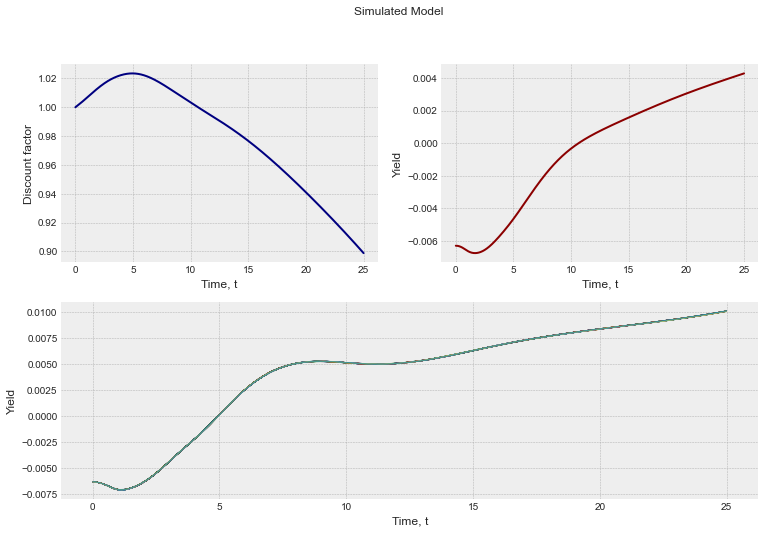

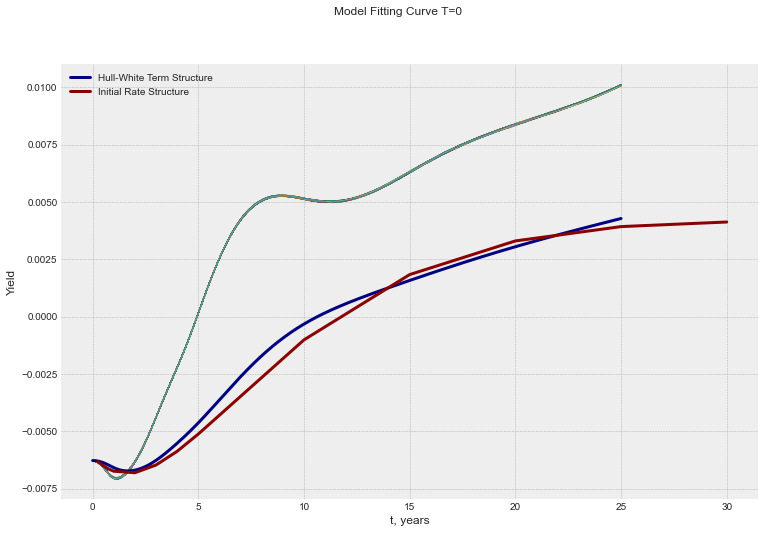

In [21]:
hull_white_model_low_vol = HullWhite(1, 0.00002, -0.0063, 25, 1 / 365, instantaneous_forward, 'cubic')
simulation = hull_white_model_low_vol.simulate_paths(1000)
simulation.plot_model()
hull_white_model_low_vol.plot_calibrated(simulation,curve)